In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [25]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [27]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [5]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

* ? here is the null values.We need to remove them inplace of imputing them as we have large dataset.

In [7]:
df.loc[df.Workclass==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [7]:
df['Education_num'].value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

In [8]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [4]:
#as education num column is already present as numerical values of education column
df.drop(['Education'],axis=1,inplace=True)

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
LE=LabelEncoder()
df['Income'] = LE.fit_transform(df['Income'])

In [7]:
df['Sex']=LE.fit_transform(df['Sex'])

In [8]:
df['Relationship']=LE.fit_transform(df['Relationship'])

In [9]:
df['Race']=LE.fit_transform(df['Race'])

In [14]:
df['Marital_status']=LE.fit_transform(df['Marital_status'])

In [10]:
#Dropping the NaN values i.e '?' from the Native_country,Occupation,Workclass column
df.drop(df[df['Native_country'] == ' ?'].index,inplace=True)
df.drop(df[df['Occupation'] == ' ?'].index,inplace=True)
df.drop(df[df['Workclass'] == ' ?'].index,inplace=True)

In [11]:
df['Native_country']=LE.fit_transform(df['Native_country'])
df['Workclass']=LE.fit_transform(df['Workclass'])
df['Occupation']=LE.fit_transform(df['Occupation'])

In [12]:
df.shape

(30161, 14)

In [15]:
df

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4,83311,13,2,3,0,4,1,0,0,13,38,0
1,38,2,215646,9,0,5,1,4,1,0,0,40,38,0
2,53,2,234721,7,2,5,0,2,1,0,0,40,38,0
3,28,2,338409,13,2,9,5,2,0,0,0,40,4,0
4,37,2,284582,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2,257302,12,2,12,5,4,0,0,0,38,38,0
32556,40,2,154374,9,2,6,0,4,1,0,0,40,38,1
32557,58,2,151910,9,6,0,4,4,0,0,0,40,38,0
32558,22,2,201490,9,4,0,3,4,1,0,0,20,38,0


In [18]:
df['Occupation'].value_counts()

9     4038
2     4030
3     3992
0     3720
11    3584
7     3212
6     1966
13    1572
5     1350
4      989
12     912
10     644
8      143
1        9
Name: Occupation, dtype: int64

In [12]:
df['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [13]:
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [14]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [14]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [34]:
import seaborn as sns

In [ ]:
sns.barplot(x='',y='Income',data=df)

In [48]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Income'>

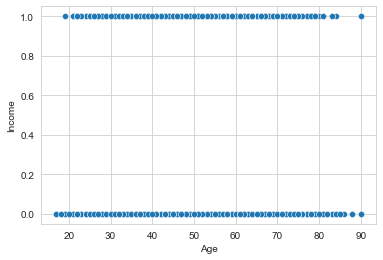

In [47]:
sns.scatterplot(x='Age',y='Income',data=df)

* Age and Income are equally distributed in the range of 0 to 85. 

<AxesSubplot:xlabel='Hours_per_week', ylabel='Income'>

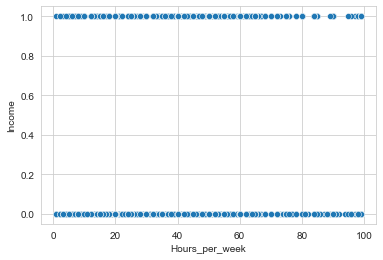

In [52]:
sns.scatterplot(x='Hours_per_week',y='Income',data=df)

* We can see income is equally distrubuted between the 0-80 hrs per week.

<AxesSubplot:xlabel='Native_country', ylabel='Income'>

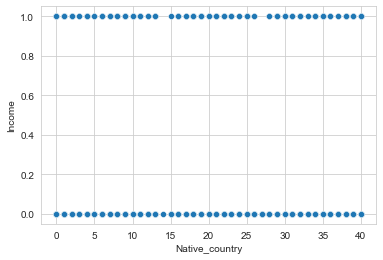

In [55]:
sns.scatterplot(x='Native_country',y='Income',data=df)

* Income Evenly distributed between Native country

<AxesSubplot:xlabel='Relationship', ylabel='Income'>

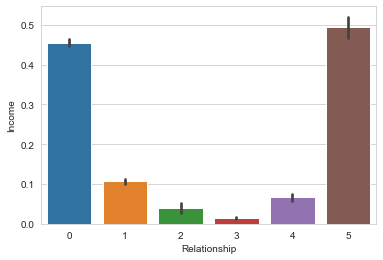

In [59]:
sns.barplot(x='Relationship',y='Income',data=df)

* Husbands and Wife have more income as compared to rest(Not_in_family,Own_child,unmarried,other-relative
in relationship column.

In [63]:
df['Relationship'].value_counts()

0    12463
1     7725
3     4466
4     3212
5     1406
2      889
Name: Relationship, dtype: int64

<AxesSubplot:xlabel='Race', ylabel='Income'>

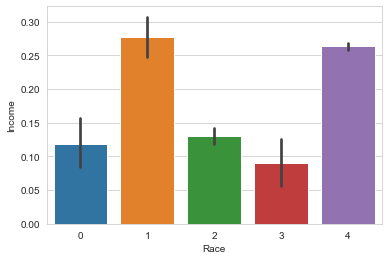

In [61]:
sns.barplot(x='Race',y='Income',data=df)

* Race 1 and Race 4 have more level of income as compared to rest races.

In [62]:
df['Race'].value_counts()

4    25932
2     2817
1      895
0      286
3      231
Name: Race, dtype: int64

<AxesSubplot:xlabel='Marital_status', ylabel='Income'>

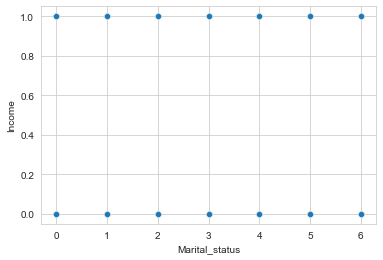

In [51]:
sns.scatterplot(x='Marital_status',y='Income',data=df)

* Income is equally distributed among the different groups in marital status

<AxesSubplot:xlabel='Workclass', ylabel='Income'>

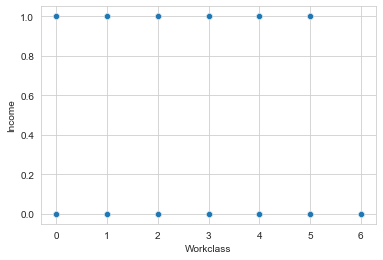

In [49]:
sns.scatterplot(x='Workclass',y='Income',data=df)

* Income is equally distributed between the range 0-5 of workclass.

<AxesSubplot:xlabel='Education_num', ylabel='Income'>

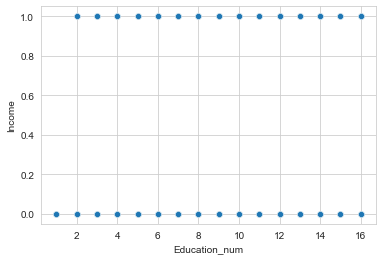

In [50]:
sns.scatterplot(x='Education_num',y='Income',data=df)

* Income is equally distributed between range 2 to 16 of education num.

In [64]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

<AxesSubplot:xlabel='Occupation', ylabel='Income'>

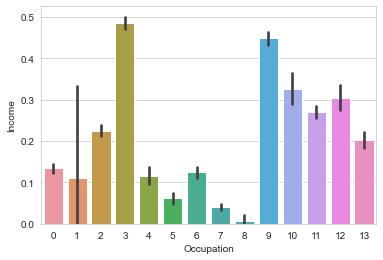

In [66]:
sns.barplot(x='Occupation',y='Income',data=df)

* (3)Exec managerial has highest salary as followed by (9) Prof-Specialty and (10)Protective-serv

<AxesSubplot:xlabel='Occupation', ylabel='Income'>

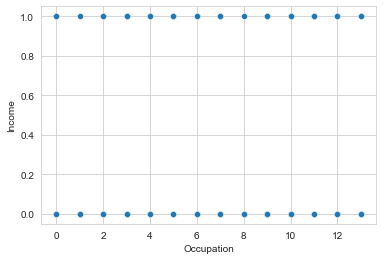

In [67]:
sns.scatterplot(x='Occupation',y='Income',data=df)

* income is evenly distributed among the occupation range.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30161 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             30161 non-null  int64
 1   Workclass       30161 non-null  int32
 2   Fnlwgt          30161 non-null  int64
 3   Education_num   30161 non-null  int64
 4   Marital_status  30161 non-null  int32
 5   Occupation      30161 non-null  int32
 6   Relationship    30161 non-null  int32
 7   Race            30161 non-null  int32
 8   Sex             30161 non-null  int32
 9   Capital_gain    30161 non-null  int64
 10  Capital_loss    30161 non-null  int64
 11  Hours_per_week  30161 non-null  int64
 12  Native_country  30161 non-null  int32
 13  Income          30161 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 3.8 MB


<AxesSubplot:>

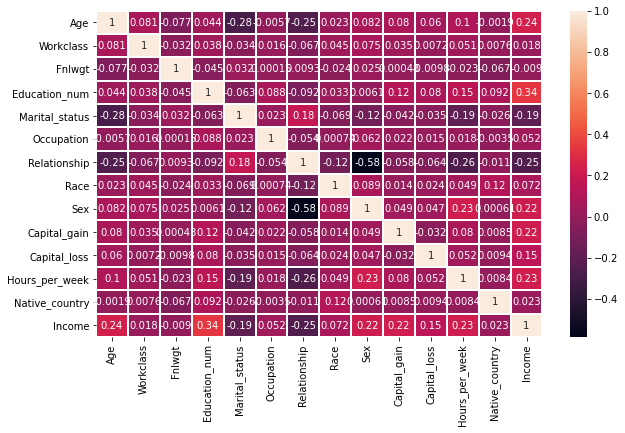

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,linewidths=1)

In [69]:
df['Income'].value_counts()
#1-More than 50K

0    22653
1     7508
Name: Income, dtype: int64

In [20]:
import seaborn as sns

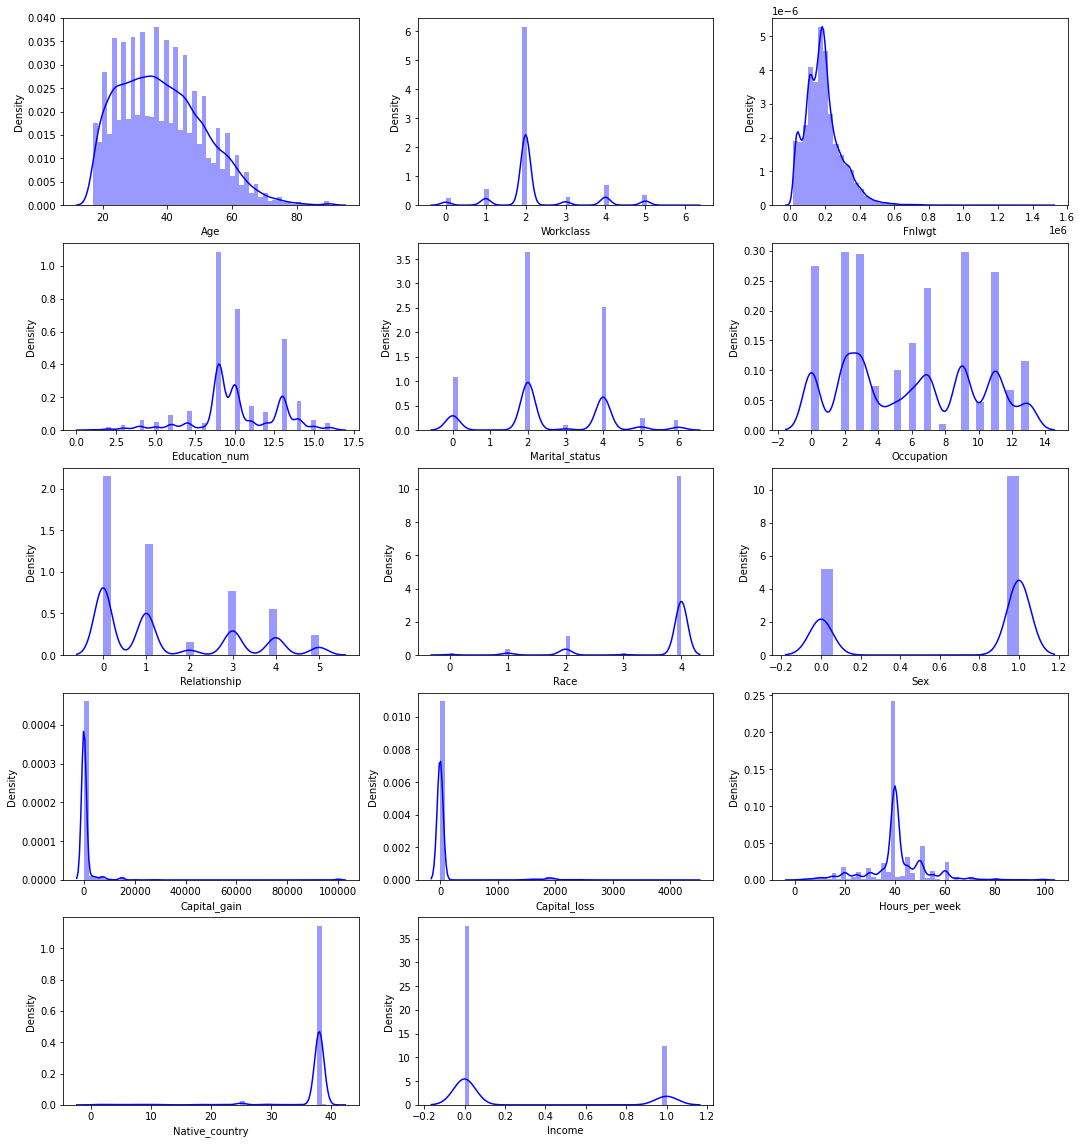

In [21]:
plt.figure(figsize=(18,20))
for i in enumerate(df):
    plt.subplot(5,3,i[0]+1)
    sns.distplot(df[i[1]],color='b')

* age,finalwgt,marital status,occupation and hrs per week as distributed nearly normal.

Age                   AxesSubplot(0.125,0.71587;0.168478x0.16413)
Workclass          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Fnlwgt             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Education_num      AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Marital_status       AxesSubplot(0.125,0.518913;0.168478x0.16413)
Occupation        AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Relationship      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Race              AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Sex                  AxesSubplot(0.125,0.321957;0.168478x0.16413)
Capital_gain      AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Capital_loss      AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Hours_per_week    AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Native_country          AxesSubplot(0.125,0.125;0.168478x0.16413)
Income               AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

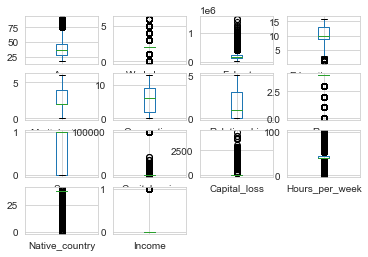

In [77]:
df.plot(kind='box',subplots=True,layout=(4,4),stacked=True) 

In [22]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df[['Capital_loss','Hours_per_week','Native_country','Age','Workclass','Fnlwgt','Education_num','Race','Capital_gain']]))
threshold = 3
df = df[(z<3).all(axis = 1)]

In [23]:
df.shape

(25759, 14)

In [24]:
df['Income'].value_counts()

0    19782
1     5977
Name: Income, dtype: int64

In [23]:
df.skew()

Age                0.443409
Workclass          1.183942
Fnlwgt             0.627870
Education_num     -0.135184
Marital_status    -0.039587
Occupation         0.122604
Relationship       0.788039
Race              -2.641835
Sex               -0.719849
Capital_gain       4.844071
Capital_loss      28.905177
Hours_per_week    -0.285632
Native_country    -5.337123
Income             1.269653
dtype: float64

* Removing skewness out of range +/- 0.65

In [25]:
from sklearn.preprocessing import power_transform

In [26]:
df[['Workclass',"Relationship",'Race','Sex','Capital_gain','Capital_loss','Native_country']]=power_transform(df[['Workclass',"Relationship",'Race','Sex','Capital_gain','Capital_loss','Native_country']])

In [27]:
from imblearn.under_sampling import RandomUnderSampler

In [22]:
df['Income'].value_counts()
#1-More than 50K

0    19782
1     5977
Name: Income, dtype: int64

In [29]:
x=df.drop(['Income'],axis=1)
y=df['Income']

In [30]:
rus = RandomUnderSampler(random_state=0)
xtrain,ytrain=rus.fit_resample(x,y)

In [31]:
ytrain.value_counts()

1    5977
0    5977
Name: Income, dtype: int64

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [34]:
model=[LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]
max_acc_score=0
for r_state in range(40,90):
    x1_train,x1_test,y1_train,y1_test=train_test_split(xtrain,ytrain,random_state=r_state,test_size=0.27)
    for i in model:
        i.fit(x1_train,y1_train)
        predx=i.predict(x1_test)
        acc_sc=accuracy_score(y1_test,predx)
        if acc_sc>max_acc_score:
            max_acc_score=acc_sc
            final_state=r_state
            final_model=i

print("max acc score correspond to random state",final_state,"is",max_acc_score,"and model is",final_model)

max acc score correspond to random state 55 is 0.8277571251548946 and model is RandomForestClassifier()


In [36]:
x1_train,x1_test,y1_train,y1_test=train_test_split(xtrain,ytrain,random_state=55,test_size=0.27)

In [37]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,xtrain,ytrain,cv=10,scoring='accuracy')
print("cross validation score for Random Forest Classifier:",np.mean(rfc_score))

cross validation score for Random Forest Classifier: 0.8158793607702105


In [40]:
parameter={'n_estimators':[100,200,350],'max_depth':range(2,10),
          'criterion':['gini','entropy'],
          'max_features':['auto','sqrt','log2']}
GCV=GridSearchCV(rfc,parameter,cv=10,scoring='accuracy',n_jobs=-1)
GCV.fit(x1_train,y1_train)
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'log2',
 'n_estimators': 200}

In [41]:
final_mod=RandomForestClassifier(criterion='gini',max_depth= 9,max_features='log2', n_estimators=200)
final_mod.fit(x1_train,y1_train)
pred=final_mod.predict(x1_test)
acc1=accuracy_score(y1_test,pred)
print(acc1)

0.8317843866171004


In [42]:
print("CLASSIFICATION REPORT::\n",classification_report(y1_test,pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.90      0.76      0.82      1665
           1       0.78      0.91      0.84      1563

    accuracy                           0.83      3228
   macro avg       0.84      0.83      0.83      3228
weighted avg       0.84      0.83      0.83      3228



In [43]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

0.834056129065726


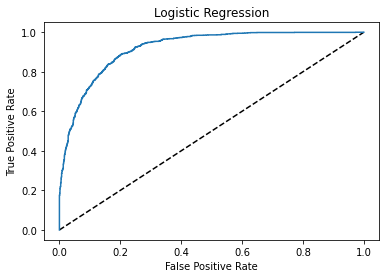

In [44]:
y_pred_prob=final_mod.predict_proba(x1_test)[:,1]
fpr,tpr,threshold=roc_curve(y1_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
auc_score=roc_auc_score(y1_test,final_mod.predict(x1_test))
print(auc_score)

In [45]:
import joblib
joblib.dump(final_mod,'census_income.obj')

['census_income.obj']

In [46]:
a=np.array(y1_test)
predicted=np.array(final_mod.predict(x1_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
df_com

,original,predicted
0,1,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
3223,1,1
3224,0,0
3225,1,1
3226,0,0
